---

# Image Compression with SVD

In this notebook, we demonstrate Singular Value Decomposition (SVD) using a grayscale image. SVD factorizes a matrix 𝐴∈𝑅^(𝑚×𝑛) into three matrices:

𝐴=𝑈Σ𝑉^𝑇
 
- U: orthogonal matrix of left singular vectors (image “row patterns”)

- Σ: diagonal matrix of singular values (importance of each component)

- V^T: orthogonal matrix of right singular vectors (image “column patterns”)

By keeping only the top k singular values and vectors, we can reconstruct a low-rank approximation of the image:

A_k=U_kΣ_kV_k^T

This shows how redundant or structured information in an image can be compressed with little loss.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

---

Load in any image and convert it to greyscale. You can use the painting included in this folder or upload your own!

---

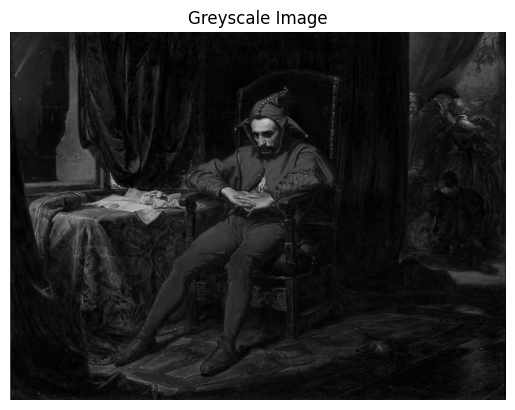

In [4]:
# Load your own grayscale PNG image
img = Image.open("Stanczyk.jpg").convert("L")  # Convert to grayscale
A = np.array(img, dtype=np.float64)

plt.imshow(A, cmap="gray")
plt.title("Greyscale Image")
plt.axis("off")
plt.show()

---

Next, we can print the shape of the corresponding matrices.

---

In [5]:
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Print shape info
print("Original shape:", A.shape)
print("U:", U.shape, "Σ:", S.shape, "Vᵀ:", VT.shape)

Original shape: (4285, 5775)
U: (4285, 4285) Σ: (4285,) Vᵀ: (4285, 5775)


---

Let's define a function for testing image reconstruction at various Ks. 

---

In [7]:
def reconstruct_image(k):
    """Reconstruct image using top k singular values"""
    Ak = U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]
    return Ak

---

Next, we can view how different K values affect the SVD on the image! Take a look at the different levels of compression and try and identify where the best balance between compression and visibility is.

---

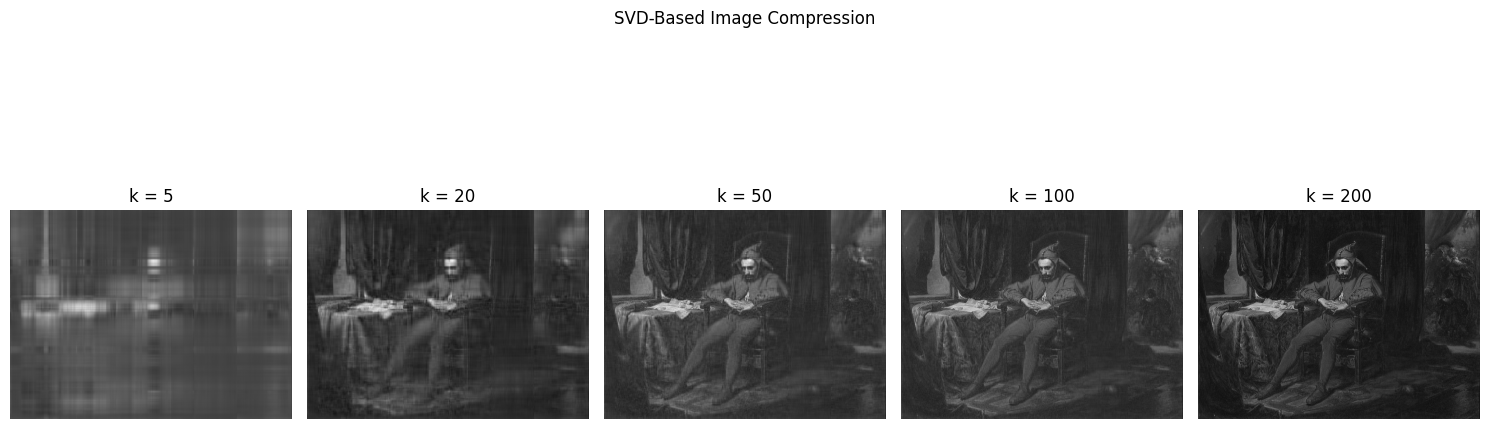

In [10]:
ks = [5, 20, 50, 100, 200]

fig, axes = plt.subplots(1, len(ks), figsize=(15, 6))

for i, k in enumerate(ks):
    Ak = reconstruct_image(k)
    axes[i].imshow(Ak, cmap="gray")
    axes[i].set_title(f"k = {k}")
    axes[i].axis("off")

plt.suptitle("SVD-Based Image Compression")
plt.tight_layout()
plt.show()

---

We can even plot how much variance is explained by different values of K. As we can see, we explain over 90 percent of the variance with extremely low Ks, with diminishing returns thereafter. This can help us identify how much compression is "enough."

---

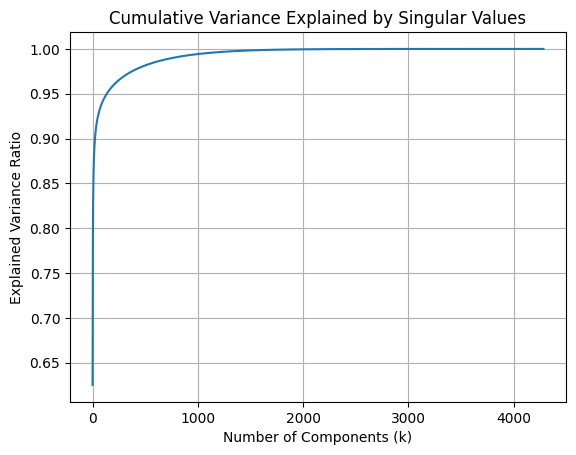

In [9]:
explained_variance = np.cumsum(S**2) / np.sum(S**2)

plt.plot(explained_variance)
plt.xlabel("Number of Components (k)")
plt.ylabel("Explained Variance Ratio")
plt.title("Cumulative Variance Explained by Singular Values")
plt.grid(True)
plt.show()

---

This holds true with what we saw above! At k = 5, the image was almost unrecognizeable, but by k = 20, it was already pretty visible. By k = 100, the image was almost identical to the uncompressed version!

---